In [5]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [6]:
# Load dataset
file_path = 'C:\Users\HP\Downloads\PTP1B_Pubchem_FingerPrint_IC50.csv'  # Replace with your file path
data = pd.read_csv(file_path)

In [7]:
# Display dataset structure
print("Dataset Shape:", data.shape)

Dataset Shape: (691, 882)


In [8]:
print("Column Names:", data.columns[:10])  # Display first 10 column names for brevity

Column Names: Index(['IC50 (nM)', 'PubchemFP0', 'PubchemFP1', 'PubchemFP2', 'PubchemFP3',
       'PubchemFP4', 'PubchemFP5', 'PubchemFP6', 'PubchemFP7', 'PubchemFP8'],
      dtype='object')


In [9]:
print(data.head())  # Show the first 5 rows

    IC50 (nM)  PubchemFP0  PubchemFP1  PubchemFP2  PubchemFP3  PubchemFP4  \
0     8000.00           1           1           0           0           0   
1        1.24           1           1           1           1           0   
2       30.00           1           1           0           0           0   
3   100000.00           1           1           0           0           0   
4  4600000.00           1           0           0           0           0   

   PubchemFP5  PubchemFP6  PubchemFP7  PubchemFP8  ...  PubchemFP871  \
0           0           0           0           0  ...             0   
1           0           0           0           0  ...             0   
2           0           0           0           0  ...             0   
3           0           0           0           0  ...             0   
4           0           0           0           0  ...             0   

   PubchemFP872  PubchemFP873  PubchemFP874  PubchemFP875  PubchemFP876  \
0             0             0

In [10]:
print(data.tail())  # Show the last 5 rows

     IC50 (nM)  PubchemFP0  PubchemFP1  PubchemFP2  PubchemFP3  PubchemFP4  \
686      209.1           0           0           0           0           0   
687       20.0           1           1           1           0           0   
688     8040.0           1           1           1           0           0   
689    21600.0           1           1           0           0           0   
690   230000.0           0           0           0           0           0   

     PubchemFP5  PubchemFP6  PubchemFP7  PubchemFP8  ...  PubchemFP871  \
686           0           0           0           0  ...             0   
687           0           0           0           0  ...             0   
688           0           0           0           0  ...             0   
689           0           0           0           0  ...             0   
690           0           0           0           0  ...             0   

     PubchemFP872  PubchemFP873  PubchemFP874  PubchemFP875  PubchemFP876  \
686      

In [11]:
print(data.info())  # Show data types and non-null counts /General information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 691 entries, 0 to 690
Columns: 882 entries, IC50 (nM) to PubchemFP880
dtypes: float64(1), int64(881)
memory usage: 4.6 MB
None


In [12]:
print(data.describe())  # Show summary statistics for numerical columns

          IC50 (nM)  PubchemFP0  PubchemFP1  PubchemFP2  PubchemFP3  \
count  6.910000e+02  691.000000  691.000000  691.000000  691.000000   
mean   6.958326e+06    0.908828    0.849493    0.643994    0.114327   
std    6.297671e+07    0.288062    0.357826    0.479164    0.318439   
min    3.000000e-01    0.000000    0.000000    0.000000    0.000000   
25%    1.135000e+03    1.000000    1.000000    0.000000    0.000000   
50%    8.000000e+03    1.000000    1.000000    1.000000    0.000000   
75%    4.400000e+04    1.000000    1.000000    1.000000    0.000000   
max    8.511380e+08    1.000000    1.000000    1.000000    1.000000   

       PubchemFP4  PubchemFP5  PubchemFP6  PubchemFP7  PubchemFP8  ...  \
count       691.0       691.0       691.0       691.0       691.0  ...   
mean          0.0         0.0         0.0         0.0         0.0  ...   
std           0.0         0.0         0.0         0.0         0.0  ...   
min           0.0         0.0         0.0         0.0         0.

In [13]:
print("\nMissing values:\n", data.isnull().sum())


Missing values:
 IC50 (nM)       0
PubchemFP0      0
PubchemFP1      0
PubchemFP2      0
PubchemFP3      0
               ..
PubchemFP876    0
PubchemFP877    0
PubchemFP878    0
PubchemFP879    0
PubchemFP880    0
Length: 882, dtype: int64


In [14]:
# Preprocess Data
# Categorize compounds based on IC50 values
data['Activity'] = np.where(data['IC50 (nM)'] <= 1000, 1, 0)  # 1 for Active, 0 for Inactive
data.drop(columns=['IC50 (nM)'], inplace=True)  # Remove original IC50 column

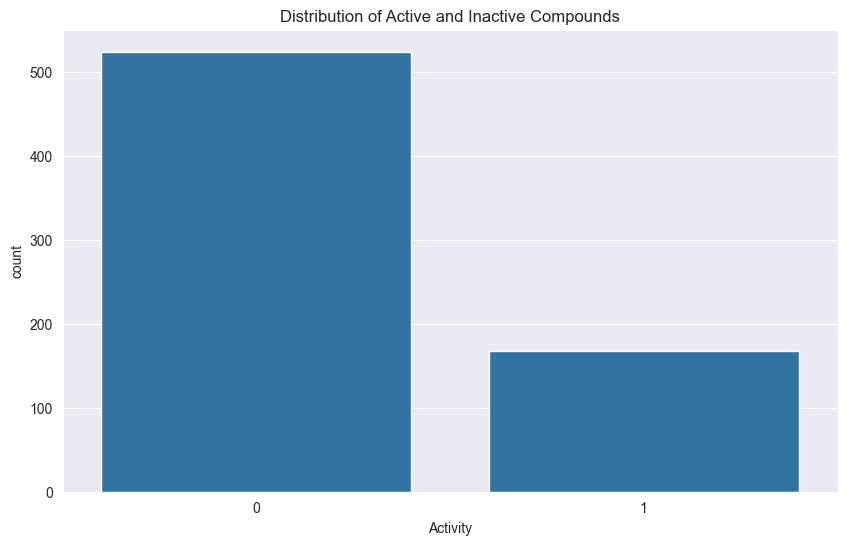

In [15]:
# Visualize data distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='Activity', data=data)
plt.title('Distribution of Active and Inactive Compounds')
plt.show()

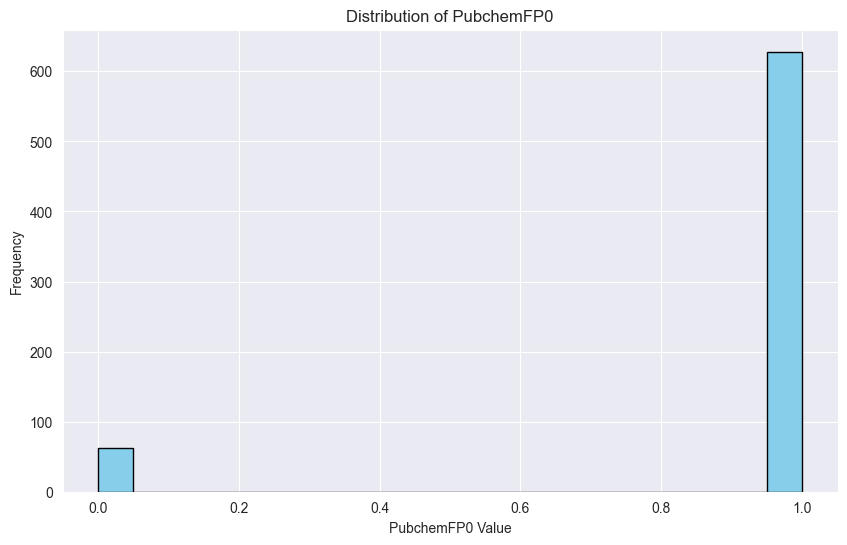

In [16]:
# Visualize data distribution using a histogram for a specific feature
plt.figure(figsize=(10, 6))
plt.hist(data['PubchemFP0'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('PubchemFP0 Value')
plt.ylabel('Frequency')
plt.title('Distribution of PubchemFP0')
plt.show()

In [17]:
# Splitting features and target variable
X = data.drop(columns=['Activity'])
y = data['Activity']

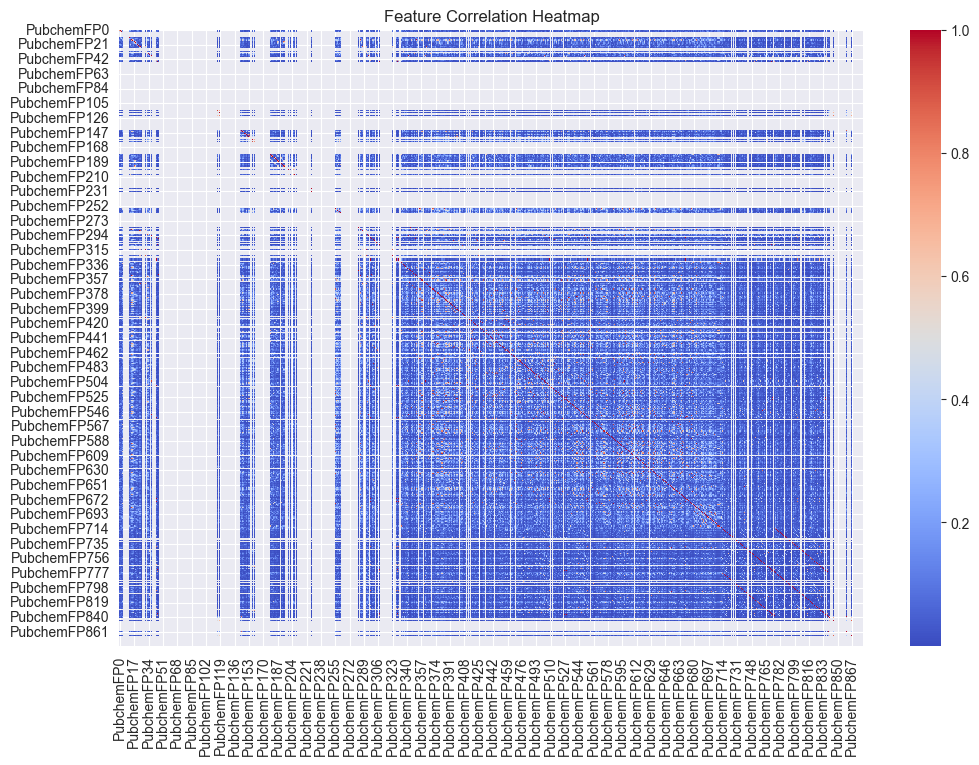

In [18]:
# Check feature correlations
correlation_matrix = X.corr().abs()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

In [19]:
correlation_matrix

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
PubchemFP0,1.000000,0.752476,0.425993,0.113796,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PubchemFP1,0.752476,1.000000,0.566122,0.151229,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PubchemFP2,0.425993,0.566122,1.000000,0.267132,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PubchemFP3,0.113796,0.151229,0.267132,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PubchemFP4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PubchemFP876,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PubchemFP877,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PubchemFP878,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PubchemFP879,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
# Dimensionality Reduction with PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

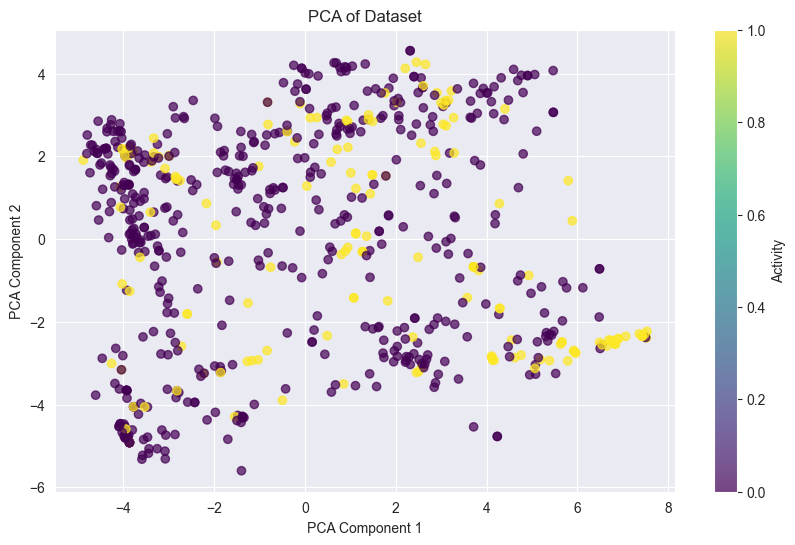

In [21]:
# Visualize PCA components
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', alpha=0.7)
plt.colorbar(label='Activity')
plt.title('PCA of Dataset')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

In [22]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [23]:
# Train Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [24]:
# Predictions and evaluation
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy)

Model Accuracy: 0.875


In [25]:
# Classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.95      0.92       155
           1       0.83      0.64      0.72        53

    accuracy                           0.88       208
   macro avg       0.86      0.80      0.82       208
weighted avg       0.87      0.88      0.87       208


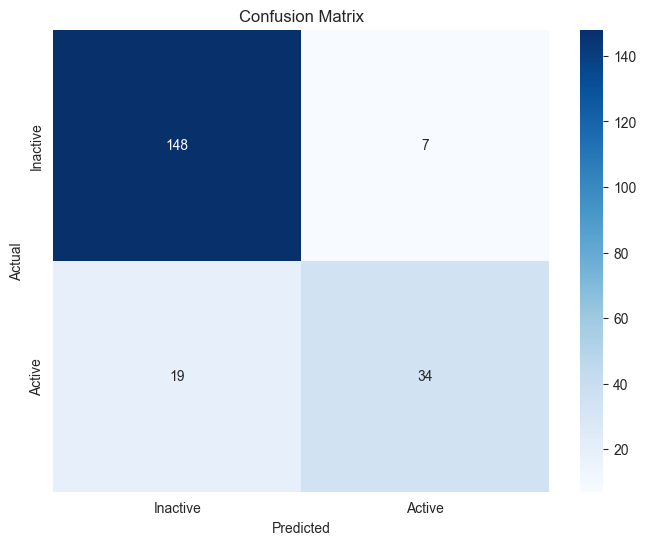

In [26]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Inactive', 'Active'], yticklabels=['Inactive', 'Active'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

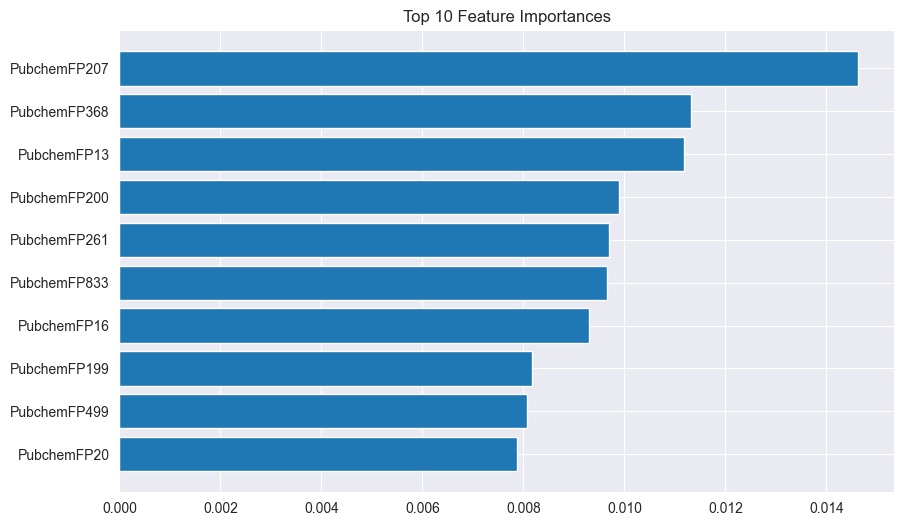

In [27]:
# Feature Importance
importances = model.feature_importances_
indices = np.argsort(importances)[-10:]  # Top 10 important features

plt.figure(figsize=(10, 6))
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [X.columns[i] for i in indices])
plt.title('Top 10 Feature Importances')
plt.show()

In [47]:
# Import Linear Regression for comparison
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score

# Train Linear Regression
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [48]:
# Predictions and Evaluation
y_pred = lr_model.predict(X_test)

In [49]:
# Convert predictions to binary for classification interpretation
y_pred_class = [1 if pred >= 0.5 else 0 for pred in y_pred]

In [50]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_class)
print("Logistic Regression Model Accuracy (Binary Classification):", accuracy)

Loogistic Regression Model Accuracy (Binary Classification): 0.8461538461538461


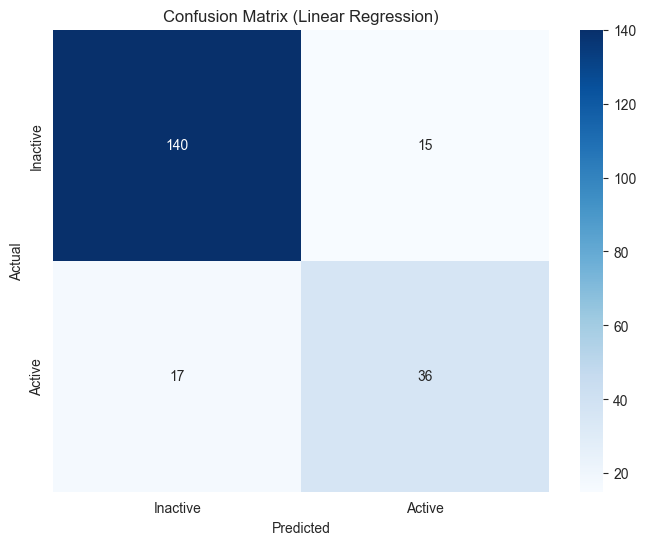

In [51]:
# Confusion Matrix for Classification
cm = confusion_matrix(y_test, y_pred_class)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Inactive', 'Active'], yticklabels=['Inactive', 'Active'])
plt.title('Confusion Matrix (Logistic Regression)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

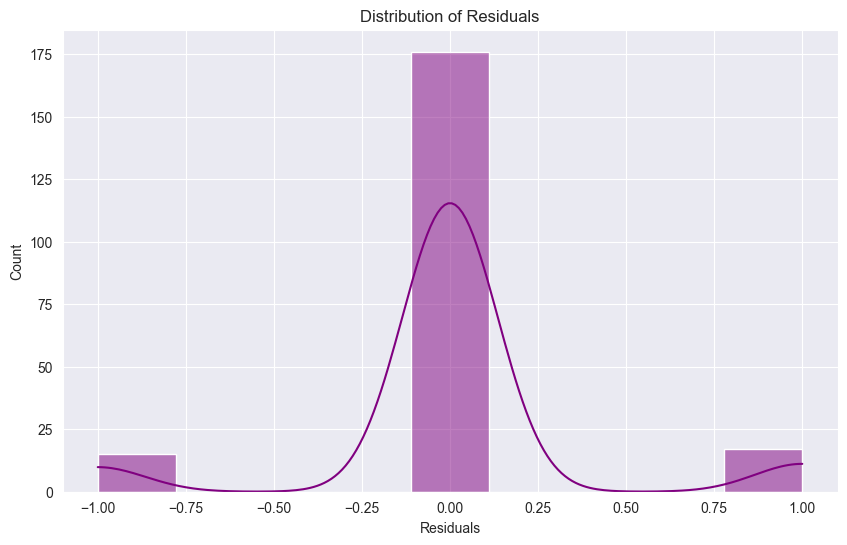

In [52]:
# Visualize Residuals
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, color='purple')
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.show()

In [53]:
# Import SVM from scikit-learn
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Train SVM Classifier
svm_model = SVC(kernel='rbf', random_state=42, probability=True)
svm_model.fit(X_train, y_train)

SVC(probability=True, random_state=42)

In [54]:
# Predictions
y_pred_svm = svm_model.predict(X_test)

In [55]:
# Evaluation Metrics
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("SVM Model Accuracy:", accuracy_svm)

SVM Model Accuracy: 0.8461538461538461


In [56]:
# Classification Report
print("\nClassification Report (SVM):\n", classification_report(y_test, y_pred_svm))


Classification Report (SVM):
               precision    recall  f1-score   support

           0       0.84      0.99      0.91       155
           1       0.92      0.43      0.59        53

    accuracy                           0.85       208
   macro avg       0.88      0.71      0.75       208
weighted avg       0.86      0.85      0.82       208


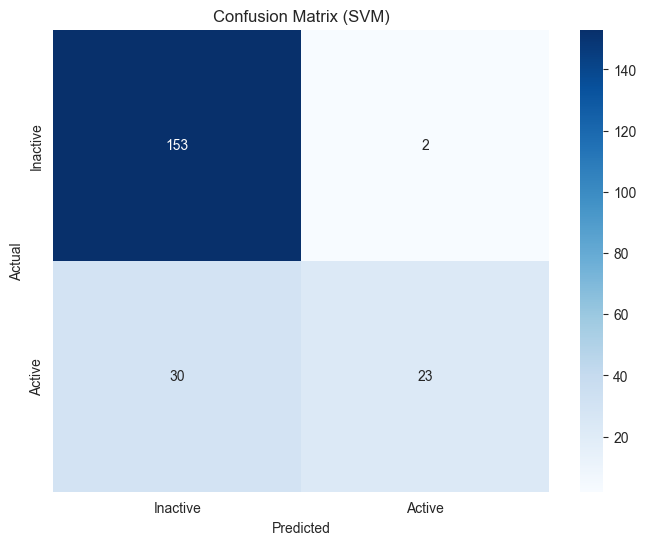

In [57]:
# Confusion Matrix
cm_svm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues', xticklabels=['Inactive', 'Active'], yticklabels=['Inactive', 'Active'])
plt.title('Confusion Matrix (SVM)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
# Decision Boundary Visualization (if dataset has 2D PCA)
if X_pca.shape[1] == 2:
    plt.figure(figsize=(10, 6))
    h = 0.02  # Mesh step size
    x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
    y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Transform the meshgrid data using the same PCA transformation used for training data
    meshgrid_data = np.c_[xx.ravel(), yy.ravel()]
    # Assuming you have a PCA object named 'pca' used for dimensionality reduction
    # If not, replace 'pca' with the actual variable name
    transformed_meshgrid_data = pca.inverse_transform(meshgrid_data)

    Z = svm_model.predict(transformed_meshgrid_data) # Predict on the transformed data
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, edgecolor='k', cmap=plt.cm.coolwarm)
    plt.title('SVM Decision Boundary (PCA-reduced data)')
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.show()

In [59]:
# Import XGBoost classifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Train XGBoost Classifier
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=50,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [60]:
# Predictions
y_pred_xgb = xgb_model.predict(X_test)

In [61]:
# Evaluation Metrics
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print("XGBoost Model Accuracy:", accuracy_xgb)

XGBoost Model Accuracy: 0.8653846153846154


In [62]:
# Classification Report
print("\nClassification Report (XGBoost):\n", classification_report(y_test, y_pred_xgb))


Classification Report (XGBoost):
               precision    recall  f1-score   support

           0       0.88      0.95      0.91       155
           1       0.80      0.62      0.70        53

    accuracy                           0.87       208
   macro avg       0.84      0.79      0.81       208
weighted avg       0.86      0.87      0.86       208


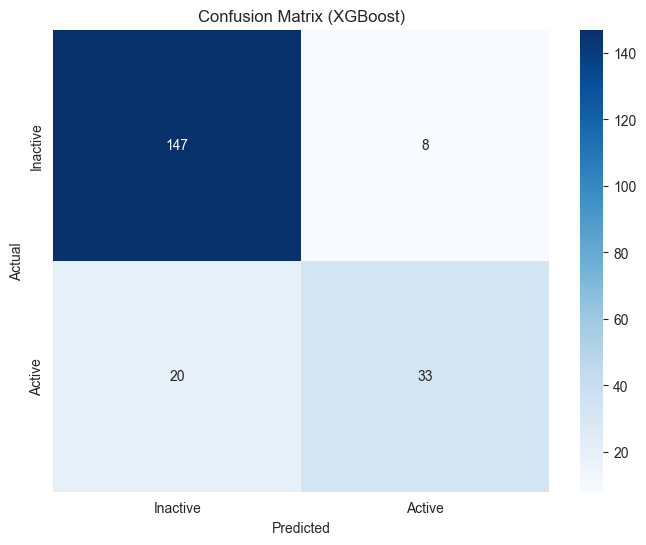

In [63]:
# Confusion Matrix
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues', xticklabels=['Inactive', 'Active'], yticklabels=['Inactive', 'Active'])
plt.title('Confusion Matrix (XGBoost)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

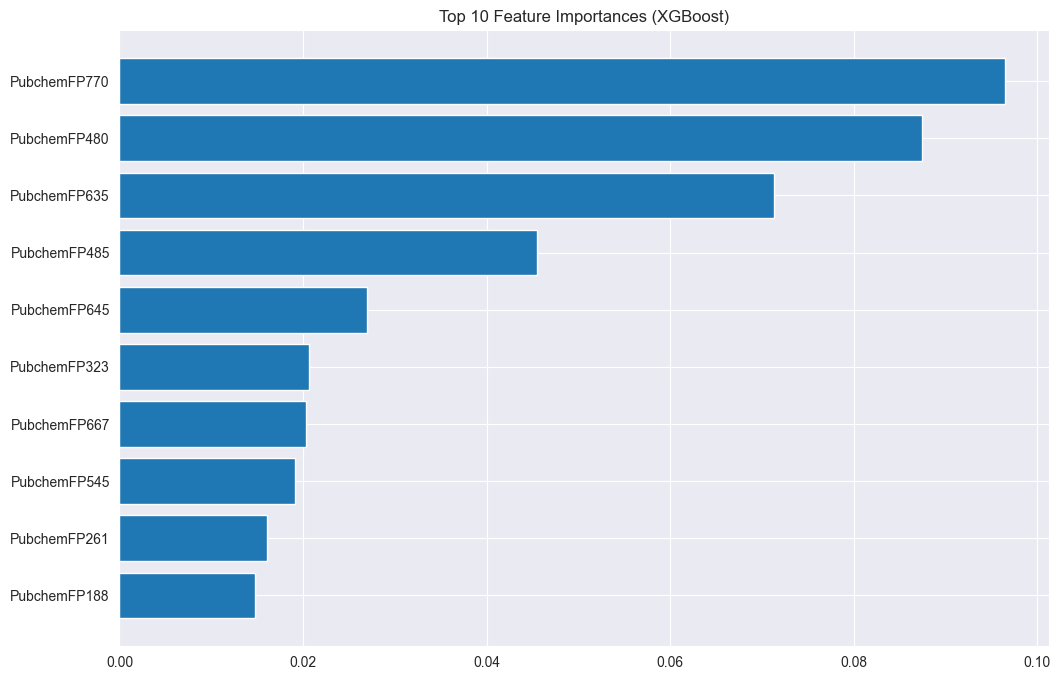

In [64]:
# Feature Importance
plt.figure(figsize=(12, 8))
feature_importances = xgb_model.feature_importances_
indices = np.argsort(feature_importances)[-10:]  # Top 10 features
plt.barh(range(len(indices)), feature_importances[indices], align='center')
plt.yticks(range(len(indices)), [X.columns[i] for i in indices])
plt.title('Top 10 Feature Importances (XGBoost)')
plt.show()

In [65]:
# Import necessary libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
import joblib

# Train K-Nearest Neighbors (KNN) model
knn_model = KNeighborsClassifier(n_neighbors=5)  # You can experiment with the number of neighbors
knn_model.fit(X_train, y_train)

# Save the trained model
joblib.dump(knn_model, 'knn_model.pkl')
print("K-Nearest Neighbors model saved successfully!")

# Predict using the model
y_pred_knn = knn_model.predict(X_test)

# Evaluate the model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("K-Nearest Neighbors Model Accuracy:", accuracy_knn)

# Load the saved model
loaded_model_knn = joblib.load('knn_model.pkl')

# Make predictions with the loaded model
y_pred_loaded_knn = loaded_model_knn.predict(X_test)

# Evaluate the loaded model
accuracy_loaded_knn = accuracy_score(y_test, y_pred_loaded_knn)
print("Loaded K-Nearest Neighbors Model Accuracy:", accuracy_loaded_knn)

K-Nearest Neighbors model saved successfully!
K-Nearest Neighbors Model Accuracy: 0.8846153846153846
Loaded K-Nearest Neighbors Model Accuracy: 0.8846153846153846
